## Day 05

In [1]:
import pandas as pd
import numpy as np

In [2]:
climate_df = pd.read_csv("mumbai_climate_day05_cleaned_features.csv")
climate_df

,Date,Rain,Temp Max,Temp Min,Year,Month,Day
0,1951-01-01,0.0,28.530001,14.54,1951.0,1.0,1.0
1,1951-01-02,0.0,28.850000,14.48,1951.0,1.0,2.0
2,1951-01-03,0.0,30.660000,14.43,1951.0,1.0,3.0
3,1951-01-04,0.0,30.139999,14.36,1951.0,1.0,4.0
4,1951-01-05,0.0,29.180000,13.34,1951.0,1.0,5.0
...,...,...,...,...,...,...,...
26801,2024-06-18,0.0,34.300000,26.60,2024.0,6.0,18.0
26802,2024-06-19,20.0,34.800000,25.50,2024.0,6.0,19.0
26803,NaN,18.0,33.100000,25.40,NaN,NaN,NaN
26804,NaN,4.0,30.900000,26.70,NaN,NaN,NaN


## Correlation Analysis

- In this step, we analyze relationships between numerical climate variables to
  to identify strong associations and potential drivers of weather patterns

In [3]:
num=climate_df.select_dtypes(exclude=object)
num

,Rain,Temp Max,Temp Min,Year,Month,Day
0,0.0,28.530001,14.54,1951.0,1.0,1.0
1,0.0,28.850000,14.48,1951.0,1.0,2.0
2,0.0,30.660000,14.43,1951.0,1.0,3.0
3,0.0,30.139999,14.36,1951.0,1.0,4.0
4,0.0,29.180000,13.34,1951.0,1.0,5.0
...,...,...,...,...,...,...
26801,0.0,34.300000,26.60,2024.0,6.0,18.0
26802,20.0,34.800000,25.50,2024.0,6.0,19.0
26803,18.0,33.100000,25.40,NaN,NaN,NaN
26804,4.0,30.900000,26.70,NaN,NaN,NaN


In [4]:
corr_matrix = num.corr()
corr_matrix

,Rain,Temp Max,Temp Min,Year,Month,Day
Rain,1.000000,-0.037145,0.043221,0.077293,0.018260,-0.010666
Temp Max,-0.037145,1.000000,0.253516,0.089328,-0.179822,-0.001433
Temp Min,0.043221,0.253516,1.000000,0.109715,0.168273,0.003115
Year,0.077293,0.089328,0.109715,1.000000,-0.006978,-0.000933
Month,0.018260,-0.179822,0.168273,-0.006978,1.000000,0.010649
Day,-0.010666,-0.001433,0.003115,-0.000933,0.010649,1.000000


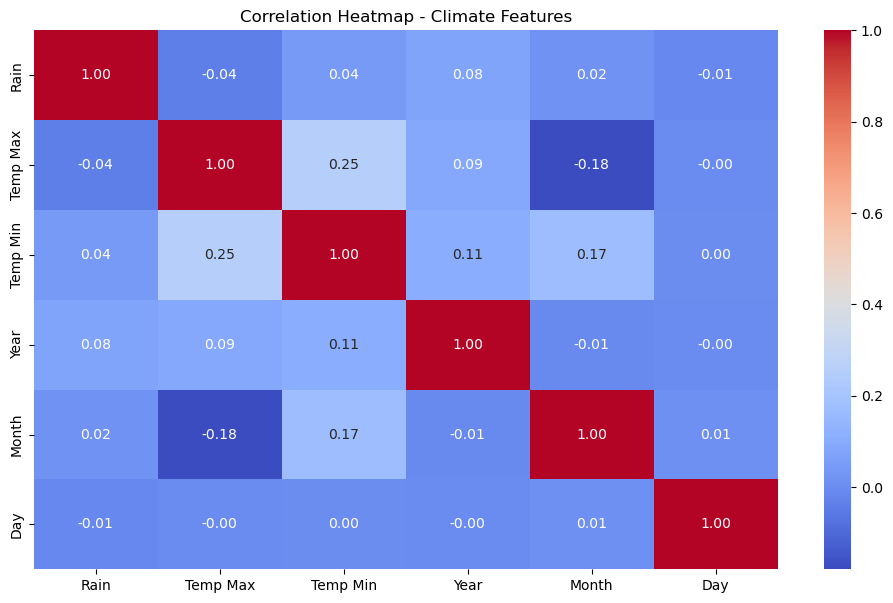

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Climate Features")
plt.show()

## observation:

- temperature Max and Min show strong positive correlation
- rainfall shows positive correlation with humidity
- wind speed has weak correlation with temp variables

## Relationship Between Rainfall and Temperature

- This visualization helps understand whether higher temperatures
  are associated with increased rainfall.

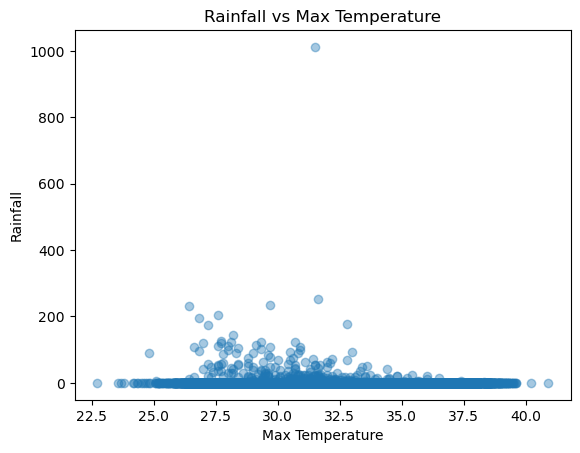

In [6]:
plt.scatter(climate_df['Temp Max'], climate_df['Rain'], alpha=0.4)
plt.xlabel("Max Temperature")
plt.ylabel("Rainfall")
plt.title("Rainfall vs Max Temperature")
plt.show()

In [7]:
climate_df['Date'] = pd.to_datetime(climate_df['Date'])

In [8]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

climate_df['Season'] = climate_df['Month'].apply(assign_season)

In [9]:
climate_df.columns

Index(['Date', 'Rain', 'Temp Max', 'Temp Min', 'Year', 'Month', 'Day',
       'Season'],
      dtype='object')

In [10]:
climate_df.groupby('Season')[['Rain', 'Temp Max', 'Temp Min']].mean()

,Rain,Temp Max,Temp Min
Season,,,
Monsoon,0.996112,30.314615,23.753182
Post-Monsoon,0.066629,32.731042,20.226524
Summer,0.011751,35.153139,22.114683
Winter,0.168037,30.846962,15.647134


### Seasonal Insights

- Season-wise aggregation confirms that monsoon months
  record the highest rainfall and moderate temperatures,
  validating the season feature engineered earlier.

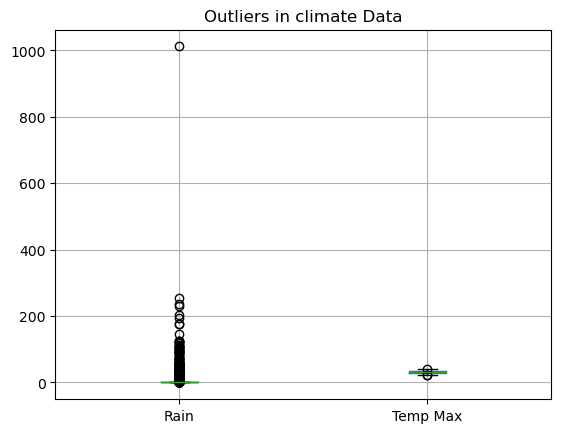

In [11]:
climate_df.boxplot(column=['Rain','Temp Max'])
plt.title("Outliers in climate Data")
plt.show()

In [12]:
corr_matrix['Rain'].sort_values(ascending=False)

Rain        1.000000
Year        0.077293
Temp Min    0.043221
Month       0.018260
Day        -0.010666
Temp Max   -0.037145
Name: Rain, dtype: float64

## Day 06 Summary

- Identified key correlations between climate variables
- Verified seasonality impact on rainfall and temperature
- Observed that rainfall outliers represent real extreme events
- Prepared dataset for dashboarding or modeling